<a href="https://colab.research.google.com/github/shibassalim/Emotion_Detector_Using_Audio/blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    try:
        with soundfile.SoundFile(file_name) as sound_file:
            X = sound_file.read(dtype="float32")
            sample_rate = sound_file.samplerate
            result = np.array([])

            if chroma or mel:
                stft = np.abs(librosa.stft(X))

            if mfcc:
                mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
                mfccs_mean = np.mean(mfccs, axis=1)  # mean across time
                result = np.hstack((result, mfccs_mean))

            if chroma:
                chroma_vals = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
                chroma_mean = np.mean(chroma_vals, axis=1)
                result = np.hstack((result, chroma_mean))

            if mel:
                mel_vals = librosa.feature.melspectrogram(y=X, sr=sample_rate)
                mel_mean = np.mean(mel_vals, axis=1)
                result = np.hstack((result, mel_mean))

            return result
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name}")
        print(str(e))
        return None


In [ ]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe - using only sub-part of dataset
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/emotiondetector/data/Actor_*[0-9]*/*"):
  file_name = os.path.basename(file)
  print(file_name)

03-01-02-01-02-01-21.wav
03-01-01-01-01-01-21.wav
03-01-01-01-01-02-21.wav
03-01-01-01-02-01-21.wav
03-01-02-01-01-01-21.wav
03-01-02-01-01-02-21.wav
03-01-01-01-02-02-21.wav
03-01-03-01-01-01-21.wav
03-01-07-01-02-02-21.wav
03-01-04-01-01-02-21.wav
03-01-05-01-01-01-21.wav
03-01-05-02-01-02-21.wav
03-01-02-01-02-02-21.wav
03-01-07-02-02-01-21.wav
03-01-08-02-01-02-21.wav
03-01-06-02-01-01-21.wav
03-01-07-01-01-02-21.wav
03-01-07-02-01-02-21.wav
03-01-05-02-02-02-21.wav
03-01-03-01-02-01-21.wav
03-01-02-02-02-02-21.wav
03-01-04-01-02-02-21.wav
03-01-02-02-02-01-21.wav
03-01-03-02-01-02-21.wav
03-01-06-02-01-02-21.wav
03-01-05-01-02-01-21.wav
03-01-05-02-02-01-21.wav
03-01-03-02-02-02-21.wav
03-01-04-01-01-01-21.wav
03-01-03-01-02-02-21.wav
03-01-08-01-02-01-21.wav
03-01-04-01-02-01-21.wav
03-01-04-02-02-01-21.wav
03-01-05-02-01-01-21.wav
03-01-07-01-02-01-21.wav
03-01-06-02-02-02-21.wav
03-01-06-01-02-01-21.wav
03-01-06-01-01-01-21.wav
03-01-08-01-01-02-21.wav
03-01-08-01-02-02-21.wav


In [ ]:
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/emotiondetector/data/Actor_*[0-9]*/*"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        if feature is not None and feature.ndim == 1:
            x.append(feature)
            y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

Error encountered while parsing file: /content/drive/MyDrive/Colab Notebooks/emotiondetector/data/Actor_20/03-01-06-01-01-02-20.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error encountered while parsing file: /content/drive/MyDrive/Colab Notebooks/emotiondetector/data/Actor_20/03-01-03-01-02-01-20.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error encountered while parsing file: /content/drive/MyDrive/Colab Notebooks/emotiondetector/data/Actor_05/03-01-02-01-02-02-05.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error encountered while parsing file: /content/drive/MyDrive/Colab Notebooks/emotiondetector/data/Actor_01/03-01-02-01-01-02-01.wav
all the input arrays must have sam

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))


(573, 191)


In [ ]:
x_train

array([[-6.83729126e+02,  7.65097580e+01,  1.03118792e+01, ...,
         1.44050416e-08,  7.99797917e-09,  7.41885886e-09],
       [-5.95656006e+02,  1.15125786e+02, -1.24864454e+01, ...,
         7.88819676e-08,  1.49779922e-08,  8.39904946e-09],
       [-4.87297180e+02,  5.84280968e+01, -5.07990217e+00, ...,
         9.59585759e-06,  1.10597409e-06,  1.26353417e-08],
       ...,
       [-5.75346497e+02,  7.90359421e+01, -3.71804571e+00, ...,
         5.09861934e-07,  3.77449041e-08,  7.52280105e-09],
       [-5.34587341e+02,  5.72555923e+01,  3.95717144e+00, ...,
         2.14899819e-06,  2.25370599e-07,  8.54454996e-09],
       [-7.06430054e+02,  9.51989594e+01,  4.84950590e+00, ...,
         1.38146277e-08,  6.97395341e-09,  6.58393828e-09]])

In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [ ]:
#Training the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
model.score(x_train, y_train)


0.8481675392670157

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.87%


In [ ]:
x_test[9]


array([-6.82112549e+02,  6.64127960e+01,  1.19786682e+01,  2.02923126e+01,
        5.12279081e+00,  1.31235285e+01, -6.24644709e+00,  4.13727379e+00,
       -5.93322182e+00, -3.90230274e+00, -1.08019280e+00, -2.51789284e+00,
       -4.89832163e+00,  1.30688310e+00,  3.24842393e-01, -2.17005181e+00,
       -4.94447023e-01,  1.10878058e-01, -3.25290537e+00, -2.08938193e+00,
       -6.10531867e-01,  3.63551140e-01, -7.35409915e-01, -7.25745022e-01,
       -2.89074242e-01, -1.09286523e+00, -8.75448883e-01, -2.48674050e-01,
       -2.11239290e+00, -6.66664660e-01, -1.75552964e+00, -2.06669974e+00,
       -1.28415513e+00, -9.05452669e-03, -1.85635161e+00,  2.48030961e-01,
       -4.86716256e-03,  1.53246796e+00,  3.64172339e+00,  4.46263790e+00,
        6.83258116e-01,  6.88949049e-01,  6.80515468e-01,  7.31700003e-01,
        7.43100345e-01,  7.41819441e-01,  7.37600982e-01,  7.13617623e-01,
        7.27781117e-01,  6.87612057e-01,  6.76231682e-01,  6.69509172e-01,
        5.40725741e-05,  

In [ ]:
y_test[9]


'disgust'

In [ ]:
y_pred[:10]

array(['fearful', 'calm', 'calm', 'fearful', 'fearful', 'disgust',
       'fearful', 'calm', 'happy', 'calm'], dtype='<U7')

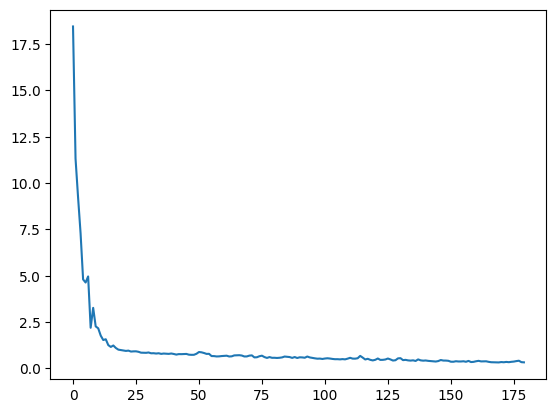

In [ ]:

loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [ ]:
model1=MLPClassifier(alpha=0.001, batch_size=128, hidden_layer_sizes=(200, 200, 100, 50), learning_rate='adaptive', max_iter=500)

#Training the model
model1.fit(x_train,y_train)

model1.score(x_train, y_train)

0.6963350785340314

In [ ]:
#Predict for the test set
y_pred1=model1.predict(x_test)

#Calculate the accuracy of our model
accuracy1=accuracy_score(y_true=y_test, y_pred=y_pred1)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy1*100))

Accuracy: 63.87%


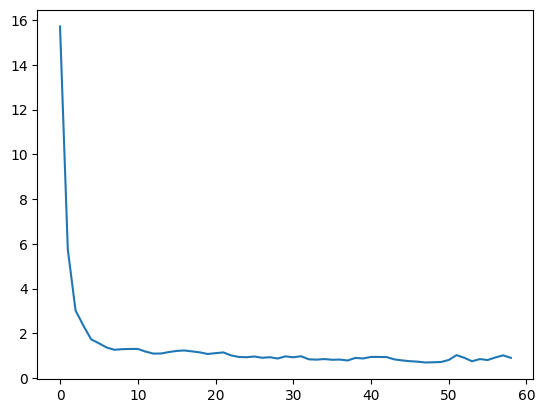

In [ ]:
# Plotting graph for MLPClassifier

loss_values1 = model1.loss_curve_
plt.plot(loss_values1)
plt.show()

In [ ]:
import pickle

pickle.dump(model1, open('/content/drive/MyDrive/Colab Notebooks/emotiondetector/emotion_classification-model.pkl', 'wb'))


In [ ]:
x_test[1]

array([-8.14471985e+02,  5.28837738e+01, -3.76480389e+00,  1.68315945e+01,
       -3.94879436e+00,  7.85744858e+00, -9.55152893e+00,  5.85881889e-01,
       -8.97634697e+00, -6.79895735e+00, -8.82480621e-01, -5.61471796e+00,
       -1.24697375e+00, -4.53817272e+00, -6.38125324e+00, -3.60084295e-01,
       -2.02196622e+00, -4.57278204e+00, -5.58723259e+00, -3.82498980e+00,
       -1.77914476e+00, -2.59605169e+00, -3.15458655e+00, -4.57557249e+00,
       -3.11296225e+00, -4.18560833e-01, -4.65705013e+00, -2.98305845e+00,
       -2.31158781e+00, -1.82203126e+00, -3.30928826e+00, -1.86004603e+00,
        6.72825515e-01, -6.92525029e-01,  1.40972936e+00,  2.30941701e+00,
        7.01421380e-01,  1.73729658e+00,  2.03923225e+00,  2.19091392e+00,
        4.60086614e-01,  4.47987229e-01,  4.72309321e-01,  4.82094109e-01,
        5.04445076e-01,  5.45895696e-01,  5.81711173e-01,  5.81636250e-01,
        5.66249549e-01,  5.33129156e-01,  5.23645401e-01,  5.12322307e-01,
        1.26019074e-06,  

In [ ]:
y_test[1]


'calm'

In [ ]:
y_pred[1]


np.str_('calm')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(100,), (200, 200), (200, 200, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [64, 128, 256],
    'max_iter': [200, 500, 1000]
}


In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Run the grid search
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 256, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
Best cross-validation score:  0.7783524027459954


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
train_score = best_model.score(x_train, y_train)
print("Training accuracy: ", train_score)

# If you have a test set, evaluate the performance on it as well
test_score = best_model.score(x_test, y_test)
print("Test accuracy: ", test_score)


Training accuracy:  1.0
Test accuracy:  0.806282722513089


In [ ]:
pickle.dump(best_model, open('/content/drive/MyDrive/Colab Notebooks/emotiondetector/emotion_det_model.pkl', 'wb'))

In [ ]:
import joblib

joblib.dump(best_model, '/content/drive/MyDrive/Colab Notebooks/emotiondetector/emotion_det_model.pkl')


['/content/drive/MyDrive/Colab Notebooks/emotiondetector/emotion_det_model.pkl']